<a href="https://colab.research.google.com/github/BogdanGFTP/fastai_course/blob/master/dogsvscats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from shutil import unpack_archive
unpack_archive('gdrive/My Drive/Fast.ai course files/dogscats.zip')

In [0]:
import matplotlib.pyplot as plt

In [4]:
!pip install "fastai==0.7.0"
!apt-get -qq install -y libsm6 libxext6 && pip install -q -U opencv-python
import cv2
from os import path
from wheel.pep425tags import get_abbr_impl, get_impl_ver, get_abi_tag
platform = '{}{}-{}'.format(get_abbr_impl(), get_impl_ver(), get_abi_tag())

accelerator = 'cu80' if path.exists('/opt/bin/nvidia-smi') else 'cpu'

!pip install -q http://download.pytorch.org/whl/{accelerator}/torch-0.3.0.post4-{platform}-linux_x86_64.whl torchvision
!pip install Pillow>=4.1.1
!pip install image
!pip install torchtext==0.2.3

!pip install seaborn --upgrade matplotlib
!pip install seaborn --upgrade pandas
!pip install seaborn --upgrade pillow
!pip install seaborn --upgrade plotly

    100% |████████████████████████████████| 122kB 8.8MB/s 
    100% |████████████████████████████████| 1.5MB 14.9MB/s 
    100% |████████████████████████████████| 61kB 20.7MB/s 
    100% |████████████████████████████████| 3.6MB 10.5MB/s 
    100% |████████████████████████████████| 184kB 27.6MB/s 
    100% |████████████████████████████████| 496.4MB 34kB/s 
    100% |████████████████████████████████| 71kB 25.8MB/s 
    100% |████████████████████████████████| 61kB 21.8MB/s 
    100% |████████████████████████████████| 92kB 7.3MB/s 
    100% |████████████████████████████████| 11.6MB 3.2MB/s 
    100% |████████████████████████████████| 81kB 25.9MB/s 
  Running setup.py bdist_wheel for bcolz ... - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ | / - \ done
  Stored in directory: /root/.cache/pip/wheels/9f/78/26/fb8c0acb9

In [0]:
from PIL import Image

In [0]:
from fastai.imports import *

In [0]:
from fastai.transforms import *
from fastai.conv_learner import *
from fastai.model import *
from fastai.dataset import *
from fastai.sgdr import *
from fastai.plots import *

In [0]:
PATH = "dogscats/"
sz=224

In [8]:
torch.cuda.is_available()

True

In [9]:
torch.backends.cudnn.enabled

True

In [10]:
files = os.listdir(f'{PATH}valid/cats')[:5]
files

['cat.7874.jpg',
 'cat.11316.jpg',
 'cat.2647.jpg',
 'cat.2189.jpg',
 'cat.11939.jpg']

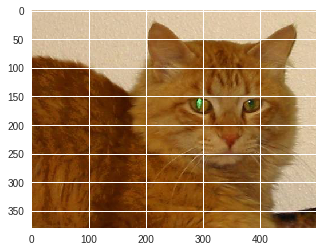

In [25]:
img = plt.imread(f'{PATH}valid/cats/{files[0]}')
plt.imshow(img);

In [26]:
img.shape

(380, 498, 3)

In [27]:
img[:4,:4]

array([[[209, 186, 155],
        [211, 188, 157],
        [214, 191, 160],
        [215, 192, 161]],

       [[210, 187, 156],
        [213, 190, 159],
        [215, 192, 161],
        [215, 192, 161]],

       [[212, 189, 158],
        [215, 192, 161],
        [217, 194, 163],
        [216, 193, 162]],

       [[214, 191, 160],
        [217, 194, 163],
        [218, 195, 164],
        [217, 194, 163]]], dtype=uint8)

In [28]:
arch=resnet34
data = ImageClassifierData.from_paths(PATH, tfms=tfms_from_model(arch, sz))
learn = ConvLearner.pretrained(arch, data, precompute=True)
learn.fit(0.01, 2)

Downloading: "https://download.pytorch.org/models/resnet34-333f7ec4.pth" to /root/.torch/models/resnet34-333f7ec4.pth
100%|██████████| 87306240/87306240 [00:00<00:00, 91757743.12it/s]


100%|██████████| 32/32 [00:15<00:00,  2.10it/s]


epoch      trn_loss   val_loss   accuracy   
    0      0.052846   0.030198   0.9885    
    1      0.052036   0.026456   0.992     



[array([0.02646]), 0.992]

In [29]:
data.val_y

array([0, 0, 0, ..., 1, 1, 1])

In [30]:
data.classes

['cats', 'dogs']

In [31]:
log_preds = learn.predict()
log_preds.shape

(2000, 2)

In [32]:
log_preds[:10]

array([[-0.00036, -7.93028],
       [-0.00007, -9.51838],
       [-0.18893, -1.75934],
       [-0.00686, -4.98516],
       [-0.00012, -8.9918 ],
       [-0.00006, -9.6643 ],
       [-0.00025, -8.28478],
       [-0.00012, -8.9981 ],
       [-0.00673, -5.00493],
       [-0.0001 , -9.17934]], dtype=float32)

In [0]:
preds = np.argmax(log_preds, axis=1)  # from log probabilities to 0 or 1
probs = np.exp(log_preds[:,1])

In [0]:
def rand_by_mask(mask): return np.random.choice(np.where(mask)[0], min(len(preds), 4), replace=False)
def rand_by_correct(is_correct): return rand_by_mask((preds == data.val_y)==is_correct)

def plots(ims, figsize=(12,6), rows=1, titles=None):
    f = plt.figure(figsize=figsize)
    for i in range(len(ims)):
        sp = f.add_subplot(rows, len(ims)//rows, i+1)
        sp.axis('Off')
        if titles is not None: sp.set_title(titles[i], fontsize=16)
        plt.imshow(ims[i])
        
def load_img_id(ds, idx): return np.array(PIL.Image.open(PATH+ds.fnames[idx]))

def plot_val_with_title(idxs, title):
    imgs = [load_img_id(data.val_ds,x) for x in idxs]
    title_probs = [probs[x] for x in idxs]
    print(title)
    return plots(imgs, rows=1, titles=title_probs, figsize=(16,8)) if len(imgs)>0 else print('Not Found.')

Correctly classified


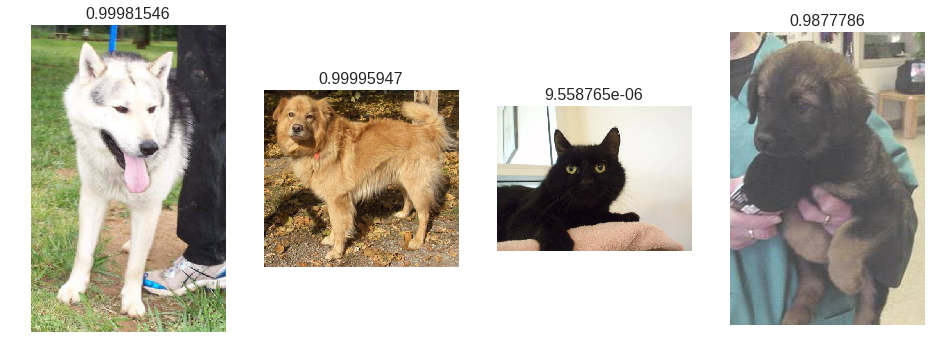

In [35]:
# 1. A few correct labels at random
plot_val_with_title(rand_by_correct(True), "Correctly classified")

Incorrectly classified


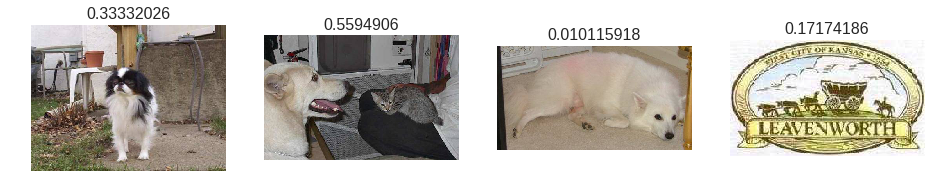

In [36]:
# 2. A few incorrect labels at random
plot_val_with_title(rand_by_correct(False), "Incorrectly classified")

In [0]:
def most_by_mask(mask, mult):
    idxs = np.where(mask)[0]
    return idxs[np.argsort(mult * probs[idxs])[:4]]

def most_by_correct(y, is_correct): 
    mult = -1 if (y==1)==is_correct else 1
    return most_by_mask(((preds == data.val_y)==is_correct) & (data.val_y == y), mult)

Most correct cats


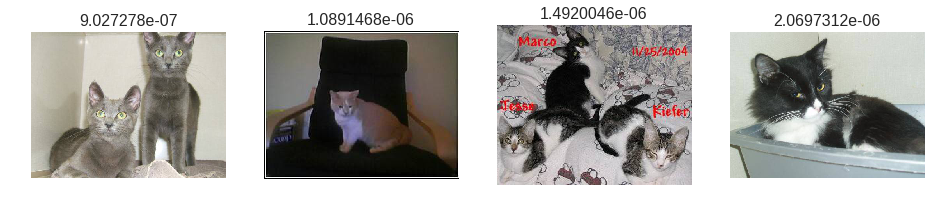

In [38]:
plot_val_with_title(most_by_correct(0, True), "Most correct cats")

Most correct dogs


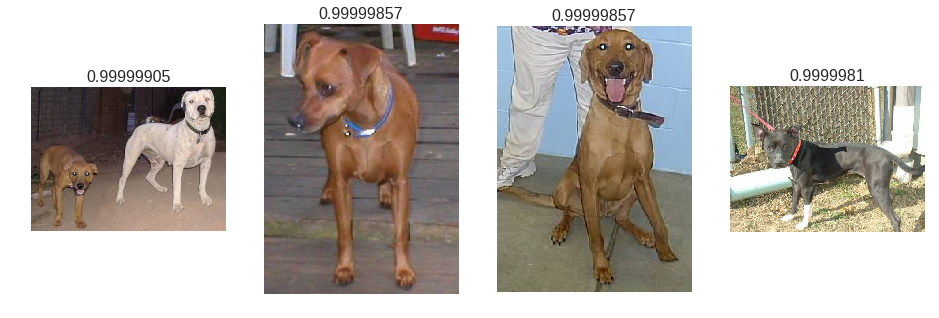

In [39]:
plot_val_with_title(most_by_correct(1, True), "Most correct dogs")

Most incorrect cats


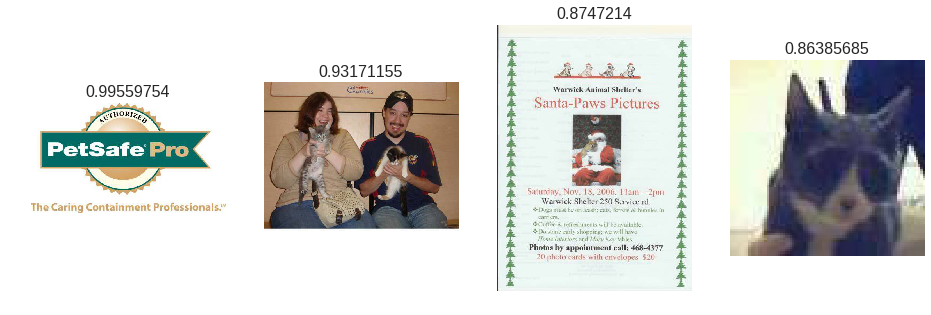

In [40]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


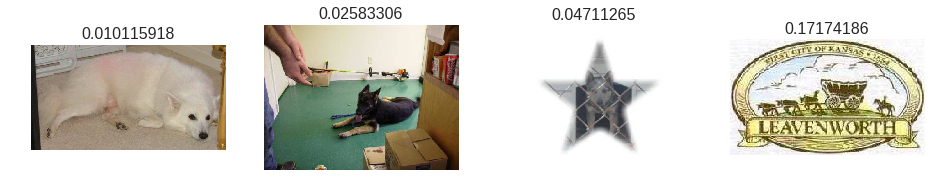

In [41]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

Most uncertain predictions


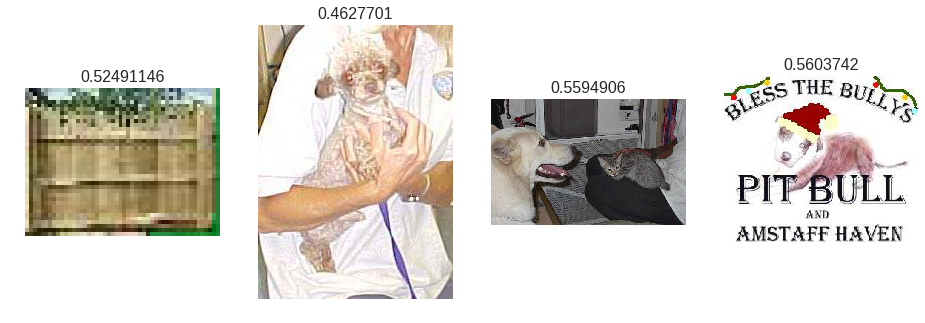

In [42]:
most_uncertain = np.argsort(np.abs(probs -0.5))[:4]
plot_val_with_title(most_uncertain, "Most uncertain predictions")

In [0]:
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [44]:
lrf=learn.lr_find()

 82%|████████▎ | 297/360 [00:07<00:01, 44.92it/s, loss=0.403]


/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:234: MatplotlibDeprecationWarning: The pylab_setup function was deprecated in version 3.0.
  matplotlib.backends.backend = newbackend


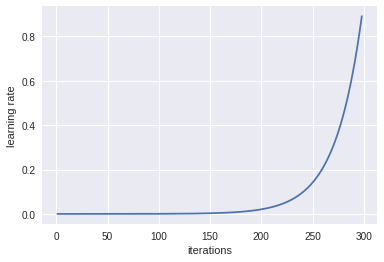

In [45]:
learn.sched.plot_lr()

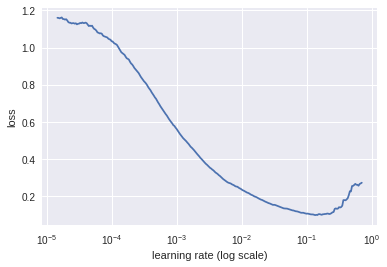

In [46]:
learn.sched.plot()

**Lesson 2**

Improving our model

In [0]:
tfms = tfms_from_model(resnet34, sz, aug_tfms=transforms_side_on, max_zoom=1.1)

In [0]:
def get_augs():
  data = ImageClassifierData.from_paths(PATH, bs=2, tfms=tfms, num_workers=1)
  x,_ = next(iter(data.aug_dl))
  return data.trn_ds.denorm(x)[1]

In [0]:
ims = np.stack([get_augs() for i in range(6)])

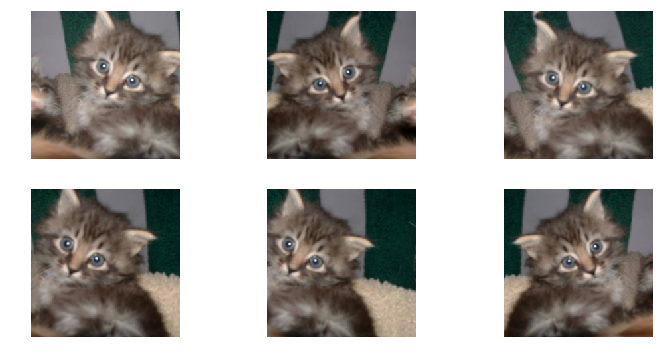

In [50]:
plots(ims, rows=2)

In [0]:
data = ImageClassifierData.from_paths(PATH, tfms=tfms)
learn = ConvLearner.pretrained(arch, data, precompute=True)

In [52]:
learn.fit(1e-2, 1)

epoch      trn_loss   val_loss   accuracy   
    0      0.063627   0.027623   0.991     



[array([0.02762]), 0.991]

In [0]:
learn.precompute=False

In [54]:
learn.fit(1e-2, 3, cycle_len=1)

epoch      trn_loss   val_loss   accuracy   
    0      0.04187    0.026518   0.9905    
    1      0.04543    0.02839    0.9885    
    2      0.045889   0.027201   0.9895    



[array([0.0272]), 0.9895]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:234: MatplotlibDeprecationWarning: The pylab_setup function was deprecated in version 3.0.
  matplotlib.backends.backend = newbackend


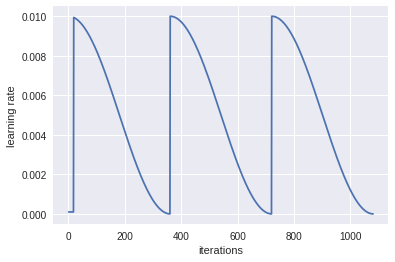

In [55]:
learn.sched.plot_lr()

In [0]:
learn.save('224_lastlayer')

In [0]:
learn.load('224_lastlayer')

In [0]:
learn.unfreeze()

In [0]:
lr = np.array([1e-4, 1e-3, 1e-2])

In [60]:
learn.fit(lr, 3, cycle_len=1, cycle_mult=2)

epoch      trn_loss   val_loss   accuracy   
    0      0.056619   0.029332   0.9885    
    1      0.037707   0.022051   0.992     
    2      0.033398   0.023029   0.9905    
    3      0.031718   0.023892   0.9905    
    4      0.026604   0.020095   0.9905    
    5      0.026183   0.024395   0.9885    
    6      0.018902   0.021452   0.9905    



[array([0.02145]), 0.9905]

/usr/local/lib/python3.6/dist-packages/matplotlib/pyplot.py:234: MatplotlibDeprecationWarning: The pylab_setup function was deprecated in version 3.0.
  matplotlib.backends.backend = newbackend


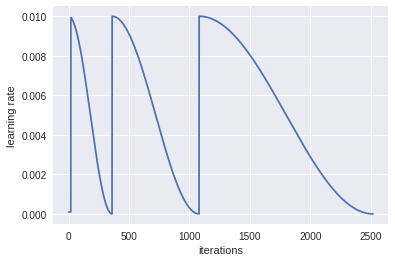

In [61]:
learn.sched.plot_lr()

In [0]:
learn.save('224_all')

In [0]:
learn.load('224_all')

In [64]:
log_preds, y = learn.TTA()
probs = np.mean(np.exp(log_preds), 0)

In [65]:
accuracy_np(probs, y)

0.993

Analyzing results

In [67]:
preds = np.argmax(probs, axis=1)
probs = probs[:, 1]

AxisError: ignored

In [0]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y, preds)

[[993   7]
 [  7 993]]


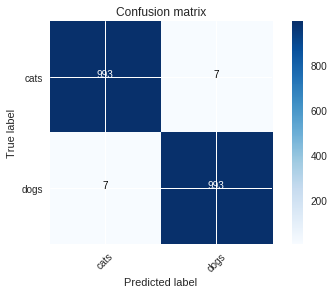

In [69]:
plot_confusion_matrix(cm, data.classes)

Most incorrect cats


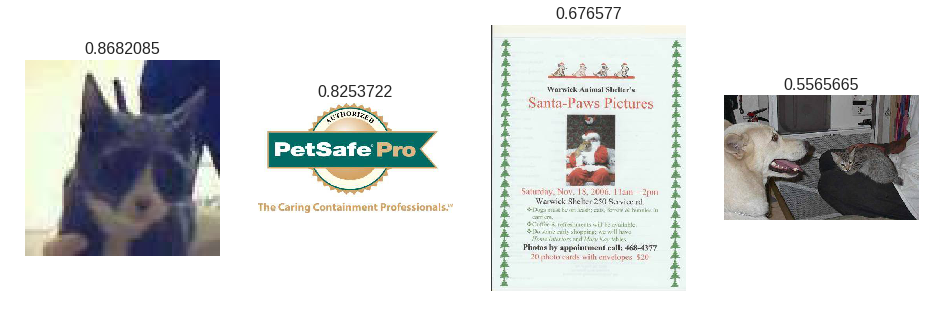

In [70]:
plot_val_with_title(most_by_correct(0, False), "Most incorrect cats")

Most incorrect dogs


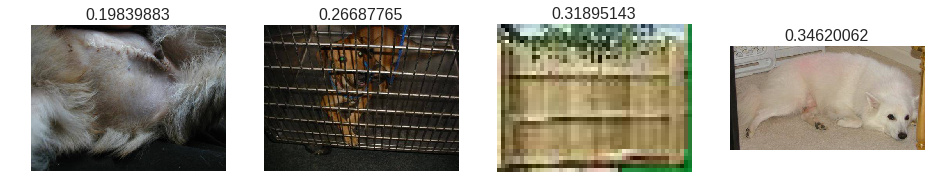

In [71]:
plot_val_with_title(most_by_correct(1, False), "Most incorrect dogs")

In [0]:
def binary_loss(y, p):
  return np.mean(-(y * np.log(p) + (1-y) * np.log(1-p)))

In [73]:
acts = np.array([1, 0, 0, 1])
preds = np.array([0.9, 0.1, 0.2, 0.8])
binary_loss(acts, preds)

0.164252033486018

In [86]:
preds = np.array([0.99, 0.01, 0.002, 0.979])
binary_loss(acts, preds)

0.010831577707325667